In [ ]:
%install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py

In [1]:
%load_ext gvmagic

In [2]:
from pyeda.inter import *

In [3]:
from pyeda.logic.addition import ripple_carry_add as RCA
from pyeda.logic.addition import kogge_stone_add as KSA

In [4]:
A = exprvars('a', 32)
B = exprvars('b', 32)

In [5]:
S_rca, C_rca = RCA(A, B)
S_ksa, C_ksa = KSA(A, B)

The expression tree is very different:

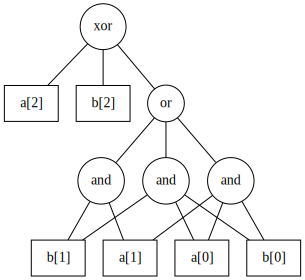

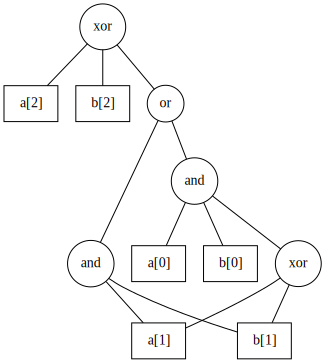

In [6]:
%dotobjs S_rca[2].simplify(), S_ksa[2].simplify()

If `XOR(f, g)` is UNSAT, functions `f` and `g` are equivalent.

But sum bit 9 is a deep expression.
Converting to CNF is impossible, so use backtracking:

In [7]:
f = Xor(S_rca[9], S_ksa[9])

In [8]:
%timeit f.satisfy_one()

768 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Let's see if we can do better using the Tseitin transformation,
and PicoSAT extension:

In [ ]:
g = f.tseitin()

In [ ]:
%timeit g.satisfy_one()

Success!

Verify that both functions returned UNSAT:

In [ ]:
assert f.satisfy_one() is None and g.satisfy_one() is None